# Kepler problem

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sqrt
from scipy.integrate import solve_ivp

### Equations of motion

In cartesian coordinates

$$
\mathcal{H} = \dfrac{1}{2} \big( p_x^2 + p_y^2 \big) - \dfrac{1}{\sqrt{x^2 + y^2}}
$$

$$
\begin{cases}
\dot{x} = & p_x \\
\dot{y} = & p_y \\
\dot{p_x} = & - \dfrac{x}{\big( x^2 + y^2 \big)^{\frac{3}{2}}} \\
\dot{p_y} = & - \dfrac{y}{\big( x^2 + y^2 \big)^{\frac{3}{2}}}
\end{cases}
$$

In [11]:
def rho(x):
    r = sqrt(x[0]**2 + x[1]**2)
    return r

def u_rho(x):
    u_r = (x[2]*x[0] + x[3]*x[1])/rho(x)
    return u_r

def dfunc(t, x):
    res = np.zeros_like(x)
    r = rho(x)
    res[0] = x[2]
    res[1] = x[3]
    res[2] = -x[0]/r**3
    res[3] = -x[1]/r**3 
    return res

### Initial conditions

$$
(x, y) = (1 - \epsilon, 0) \qquad (p_x, p_y) = \bigg( 0, \sqrt{\dfrac{1 + \epsilon}{1 - \epsilon}} \bigg)
$$

In [12]:
eps = 0.6

init = [1 - eps, 0, 0, sqrt((1 + eps)/(1 - eps))]

### Time scale

In [13]:
N = 120 # Number of points per rotation
K = 1   # Number of rotations

t_max = 2*np.pi*K
dt = 2*np.pi/N
t = np.arange(0, t_max, dt)

### Numerical solution

In [14]:
sol = solve_ivp(dfunc, t[[0, -1]], init, method="Radau", t_eval=t)

### Orbit in $(x, y)$ plane

Text(-1.5897506076039558, 0.8137064452565623, '$\\epsilon$ = 0.6')

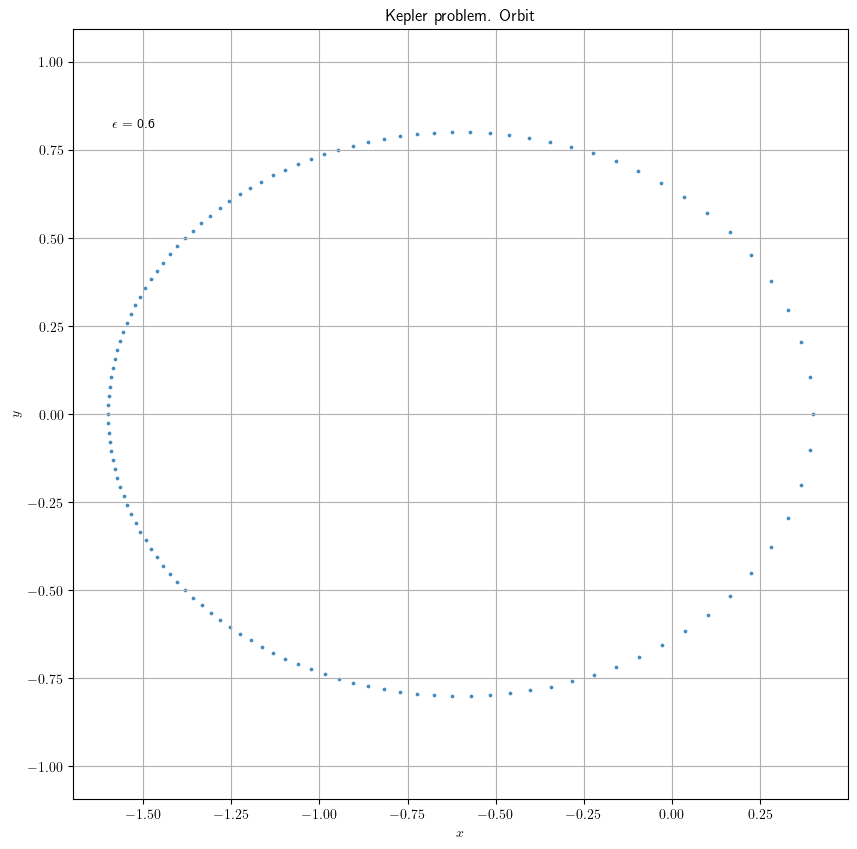

In [15]:
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(10, 10))
plt.title("Kepler problem. Orbit")
plt.axis("equal")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid(True)
plt.scatter(sol.y[0], sol.y[1], s=3, alpha=0.75)
xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmin + 0.05*(xmax - xmin), ymax - 0.03*(xmax - xmin), "$\epsilon$ = {}".format(eps))

### Radial phase space section in $(r, p_r)$ plane

$$
p_r = \dfrac{x p_x + y p_y}{\sqrt{x^2 + y^2}}
$$

Text(0.405998746841527, 0.7845006828991808, '$\\epsilon$ = 0.6')

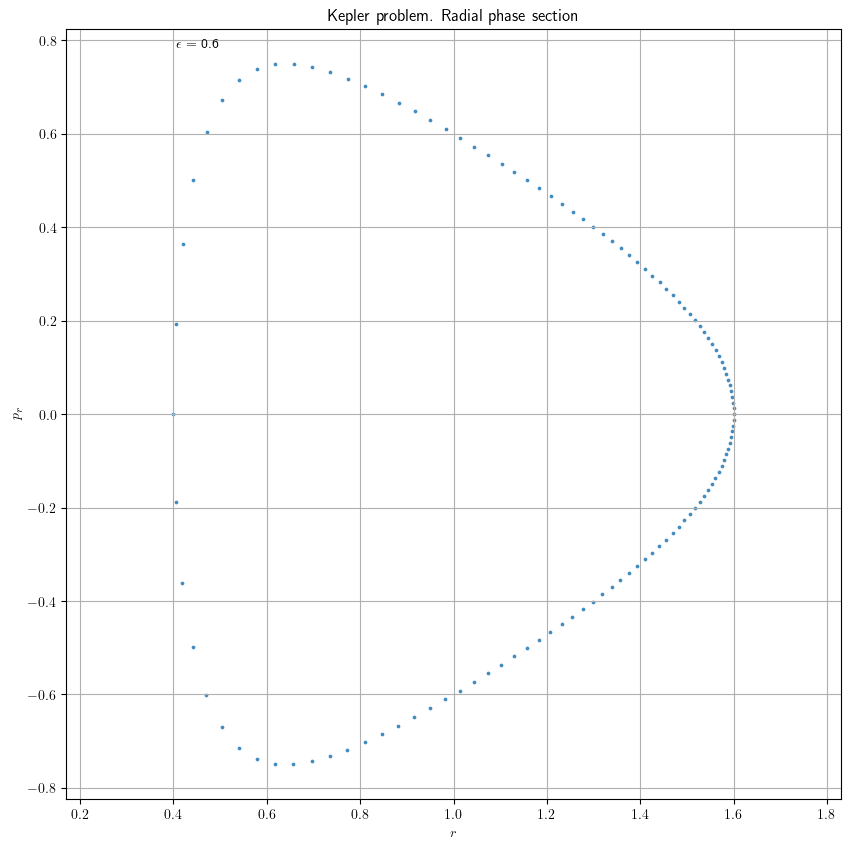

In [16]:
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(10, 10))
plt.title("Kepler problem. Radial phase section")
plt.axis("equal")
plt.xlabel(r"$r$")
plt.ylabel(r"$p_r$")
plt.grid(True)
plt.scatter(rho(sol.y), u_rho(sol.y), s=3, alpha=0.75)
xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmin + 0.05*(xmax - xmin), ymax - 0.03*(xmax - xmin), r"$\epsilon$ = {}".format(eps))

### Constants of the motion

In [17]:
def energy(x):
    E = 0.5*(x[2]**2 + x[3]**2) - 1/rho(x)
    return E

def angular(x):
    L = x[0]*x[3] - x[1]*x[2]
    return L

### Accumulated errors

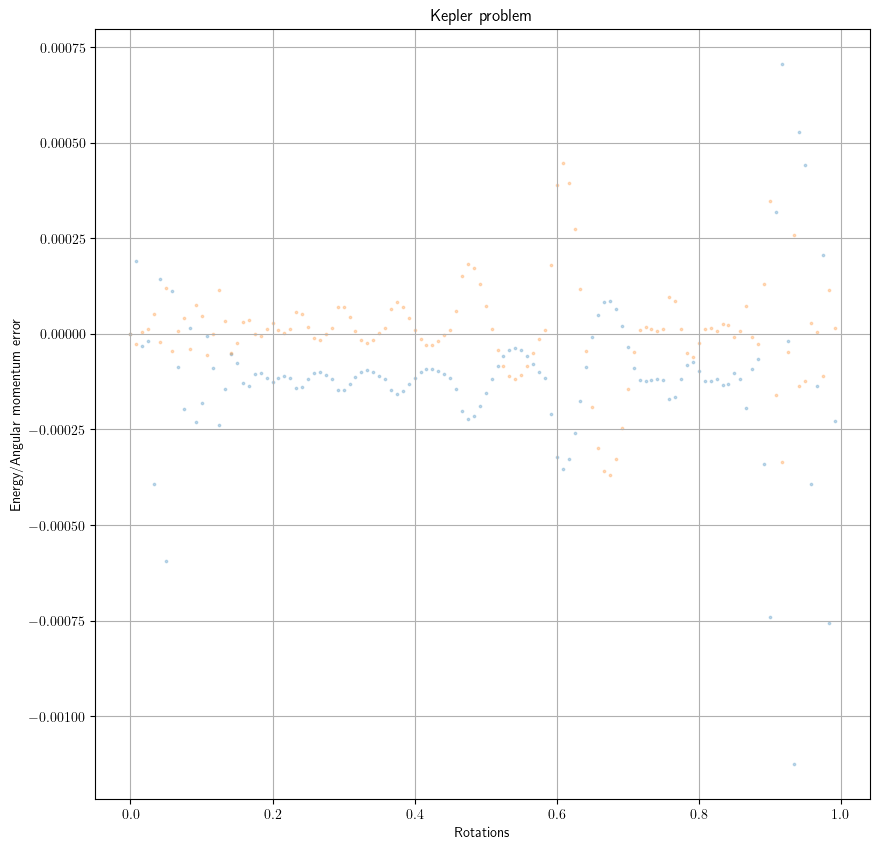

In [18]:
plt.figure(figsize=(10, 10))
plt.title("Kepler problem")
plt.xlabel("Rotations")
plt.ylabel("Energy/Angular momentum error")
plt.grid(True)
E_0 = energy(init)
L_0 = angular(init)
plt.scatter(sol.t/(2*np.pi), (E_0 - energy(sol.y))/E_0, s=3, alpha=0.25)
plt.scatter(sol.t/(2*np.pi), (L_0 - angular(sol.y))/L_0, s=3, alpha=0.25)